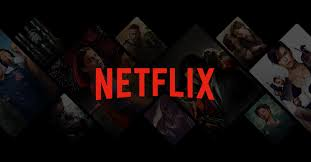

Hello Everyone!!!,<br/>
        Welcome to this notebook, here I'm going to perform Exploratory Data Analysis on Netflix shows dataset. Special thing about this notebook is I have only used basic plots to explain the data informations visually, so that anyone can understand the implications.

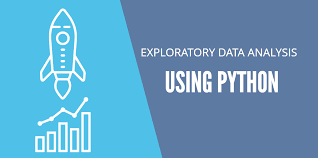

### Contents

1. Importing Libraries<br/>
2. Loading Data Frame and Displaying it's content<br/>
3. Top 10 Countries with most and least number no.of TV shows and Movies<br/>
4. TV Shows with more no.of seasons<br/>
5. Movie Duration Distribution<br/>
6. Top 10 years with most no.of movies and series<br/>
7. Top 10 country with most no.of movies and series released on the most no.of movies and series released year<br/>
8. Director with most no.of movies and series<br/>
9. Category and Rating<br/>
10. Category verses Rating for Top 3 Categories<br/>
11. Top 10 Directors having most no.of movies and TV Shows grouped by rating<br/>
12. Top 10 Directors having most no.of movies grouped by category<br/>

# Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Loading Data Frame and Displaying it's content

In [ ]:
df =  pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [ ]:
df.head()

In [ ]:
df.columns

# Top 10 Countries with most and least number no.of TV shows and Movies

In [ ]:
query1 = df.title.groupby([df.type,df.country]).count()

In [ ]:
sub_query1 = query1[('Movie',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 Countries with most no.of movies')
sns.barplot(y = sub_query1.index,x = sub_query1.values)

In [ ]:
sub_query2 = query1[('Movie',)].sort_values(ascending =True)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with least no. of movies')
sns.barplot(y = sub_query2.index,x = sub_query2.values)

In [ ]:
sub_query3 = query1[('TV Show',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with most no. of TV Shows')
sns.barplot(y = sub_query3.index,x = sub_query3.values)

In [ ]:
sub_query4 = query1[('TV Show',)].sort_values(ascending =True)[:10]
plt.figure(figsize =(10,10))
plt.title('Top 10 countries with least no.of TV Shows')
sns.barplot(y = sub_query4.index,x = sub_query4.values)

# TV Shows with more no.of seasons

In [ ]:
cond = df[['duration']].apply(lambda x:x.str.contains('Season|Seasons',regex =True)).any(axis =1)

In [ ]:
query2 = df[cond]
query2.index = np.arange(len(query2))
query2['season']=query2.duration.str[:2]
list1 = list(query2['season'])
for i in range(len(list1)):
    list1[i] = int(list1[i])
query2['season'] = list1

In [ ]:
plt.figure(figsize =(10,10))
sns.countplot(x=query2.season)
plt.title('TV Shows no.of seasons Distributions')

In [ ]:
sub_query5 =query2.season.groupby(query2.title).sum().sort_values(ascending = False)
plt.figure(figsize =(10,10))
sns.barplot(y=sub_query5[sub_query5>=9].index,x = sub_query5[sub_query5>=9].values)
plt.title('TV Shows with more no.of seasons')

# Movie Duration Distribution

In [ ]:
cond = df[['duration']].apply(lambda x:x.str.contains('Season|Seasons',regex =True)).any(axis =1)
query3 = df[~cond]
query3.index = np.arange(len(query3))
list1 =[]
for i in query3.duration:
    if i[2]=='m':
        list1.append(int(i[:2]))
    else:
        list1.append(int(i[:3]))
query3['duration_'] = list1        

In [ ]:
plt.figure(figsize =(10,5))
sns.distplot(query3.duration_,kde =False)
plt.title('Movie Duration Distribution')

In [ ]:
plt.figure(figsize =(5,5))
sns.boxplot(x = query3.duration_)
plt.title('Movie Duration Distribution (Box plot)')
plt.show()

# Top 10 years with most no.of movies and series

In [ ]:
query4 = df.title.groupby([df.type,df.release_year]).count()

In [ ]:
sub_query6 = query4[('Movie',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(x = sub_query6.index,y = sub_query6.values)
plt.title('Top 10 years with most no.of movies')

In [ ]:
sub_query7 = query4[('TV Show',)].sort_values(ascending =False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(x = sub_query7.index,y = sub_query7.values)
plt.title('Top 10 years with most no.of TV Shows')

# Top 10 country with most no.of movies and series released on the most no.of movies and series released year

In [ ]:
query5 = df.title.groupby([df.type,df.release_year,df.country]).count()

In [ ]:
sub_query8=query5[('Movie',2017,)].sort_values(ascending = False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(y = sub_query8.index,x = sub_query8.values)
plt.title('Top 10 country with most no.of movies released on the most no.of movies released year')

In [ ]:
sub_query9=query5[('TV Show',2019,)].sort_values(ascending = False)[:10]
plt.figure(figsize =(10,10))
sns.barplot(y = sub_query9.index,x = sub_query9.values)
plt.title('Top 10 country with most no.of TV Shows released on the most no.of series released year')

# Director with most no.of movies and series

In [ ]:
query6 = df[~cond]
query6.index = np.arange(len(query6))
sub_query10 = query6.director.value_counts()[:10]
plt.figure(figsize=(10,15))
sns.barplot(y = sub_query10.index,x = sub_query10.values)
plt.title('Director with most no.of movies')

In [ ]:
query7 = df[cond]
query7.index = np.arange(len(query7))
sub_query11 = query7.director.value_counts()[:10]
plt.figure(figsize=(10,15))
sns.barplot(y = sub_query11.index,x = sub_query11.values)
plt.title('Director with most no.of TV Shows')

# Category and Rating

In [ ]:
plt.figure(figsize =(10,5))
sns.lineplot(x = df.rating.value_counts().index,y = df.rating.value_counts().values)
plt.title('Rating-type Distribution')

In [ ]:
query8 =df.listed_in.value_counts().sort_values(ascending =False)
query8= query8[:5]

In [ ]:
plt.figure(figsize =(20,10))
query8.plot()
plt.title('Top 5 Category Distribution')

# Category verses Rating for Top 3 Categories

In [ ]:
df.listed_in.value_counts()[:3]

In [ ]:
plt.figure(figsize = (10,15))
plt.subplot(3,1,1)
df[df['listed_in']== 'Documentaries'].rating.value_counts().plot(colormap='jet',title='Documentaries')
plt.subplot(3,1,2)
df[df['listed_in']== 'Stand-Up Comedy'].rating.value_counts().plot(colormap='prism_r',title = 'Stand-Up Comedy')
plt.subplot(3,1,3)
df[df['listed_in']== 'Dramas, International Movies'].rating.value_counts().plot(colormap='rainbow',title = 'Dramas, International Movies')

# Top 10 Directors having most no.of movies and TV Shows grouped by rating

In [ ]:
plt.figure(figsize=(10,10))
query9 = df[~cond]
query9 = query9.title.groupby([query9['director'],query9['rating']]).count().sort_values(ascending =False)[:10]
sns.barplot(y = query9.index,x = query9.values)
plt.title('Top 10 Directors having most no.of movies grouped by rating')

In [ ]:
plt.figure(figsize=(10,10))
query10 = df[cond]
query10 = query10.title.groupby([query10['director'],query10['rating']]).count().sort_values(ascending =False)[:10]
sns.barplot(y = query10.index,x = query10.values)
plt.title('Top 10 Directors having most no.of TV shows grouped by rating')

# Top 10 Directors having most no.of movies grouped by category

In [ ]:
plt.figure(figsize=(10,10))
query11 = df[~cond]
query11 = query11.title.groupby([query11['director'],query11['listed_in']]).count().sort_values(ascending =False)[:10]
sns.barplot(y = query11.index,x = query11.values)
plt.title('Top 10 Directors having most no.of movies grouped by category')

In [ ]:
plt.figure(figsize=(10,10))
query12 = df[cond]
query12 = query12.title.groupby([query12['director'],query12['listed_in']]).count().sort_values(ascending =False)[:10]
sns.barplot(y = query12.index,x = query12.values)
plt.title('Top 10 Directors having most no.of TV Shows grouped by category')

Thanks for your valuable time :)<br/>
#### Upvote the content!!!